In [71]:
import pandas as pd 
import numpy as np 

In [72]:
df = pd.read_csv("Food_Inspections.csv")
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2561123,LOWCOUNTRY,LOWCOUNTRY,1042664.0,Restaurant,Risk 1 (High),3343 N CLARK ST,CHICAGO,IL,60657.0,07/21/2022,Complaint,No Entry,NaN,41.942869,-87.652863,"(41.942869318828365, -87.65286280377227)"
1,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN
2,2557095,WOW BAO,WOW BAO,1379974.0,Restaurant,Risk 1 (High),835 N MICHIGAN AVE,CHICAGO,IL,60611.0,06/09/2022,Canvass Re-Inspection,Pass,NaN,41.897741,-87.623961,"(41.897740856252504, -87.62396131598219)"
3,2557044,PAN ARTESANAL,PAN ARTESANAL,2602146.0,Bakery,Risk 1 (High),3724 W FULLERTON AVE,CHICAGO,IL,60647.0,06/09/2022,Canvass,Pass,NaN,41.924670,-87.720445,"(41.92467025197142, -87.72044496440567)"
4,2556917,BISTRO,BISTRO,2846045.0,Restaurant,Risk 1 (High),1400 S JEAN BAPTISTE POINTE DUSABLE LAKESHORE DR,CHICAGO,IL,60605.0,06/07/2022,Canvass,Pass,NaN,NaN,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247140 entries, 0 to 247139
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    247140 non-null  int64  
 1   DBA Name         247140 non-null  object 
 2   AKA Name         244655 non-null  object 
 3   License #        247132 non-null  float64
 4   Facility Type    242113 non-null  object 
 5   Risk             247064 non-null  object 
 6   Address          247140 non-null  object 
 7   City             246968 non-null  object 
 8   State            247093 non-null  object 
 9   Zip              247062 non-null  float64
 10  Inspection Date  247140 non-null  object 
 11  Inspection Type  247139 non-null  object 
 12  Results          247140 non-null  object 
 13  Violations       179983 non-null  object 
 14  Latitude         246287 non-null  float64
 15  Longitude        246287 non-null  float64
 16  Location         246287 non-null  obje

In [74]:
df.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2485
License #              8
Facility Type       5027
Risk                  76
Address                0
City                 172
State                 47
Zip                   78
Inspection Date        0
Inspection Type        1
Results                0
Violations         67157
Latitude             853
Longitude            853
Location             853
dtype: int64

In [75]:
df["Results"].nunique()

7

In [76]:
df["Results"].unique()

array(['No Entry', 'Out of Business', 'Pass', 'Not Ready', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

1. Selecting only data corresponding to failed inspections

In [77]:
df_new = df[df["Results"]=="Fail"]

In [78]:
df_new.shape

(47947, 17)

In [79]:
df_new.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            655
License #             3
Facility Type       380
Risk                 22
Address               0
City                 35
State                10
Zip                  10
Inspection Date       0
Inspection Type       0
Results               0
Violations         3342
Latitude            169
Longitude           169
Location            169
dtype: int64

2. Cleaning the Violations column and dropping nan values

In [80]:
df_final = df_new[~df_new["Violations"].isnull()]

In [81]:
df_final.isnull().sum()

Inspection ID        0
DBA Name             0
AKA Name           465
License #            2
Facility Type       34
Risk                 1
Address              0
City                22
State               10
Zip                  5
Inspection Date      0
Inspection Type      0
Results              0
Violations           0
Latitude           155
Longitude          155
Location           155
dtype: int64

3. Inspecting the violation columns 

In [82]:
list(df_final["Violations"][:1])


["6. PROPER EATING, TASTING, DRINKING, OR TOBACCO USE - Comments: 2-401.11  OBSERVED COFFEE CUPS, PIZZA BOXES AND DOUGHNUTS STORED IN THE MEAT PREP AREA ON THE CUTTING BOARDS AND COUNTERTOPS.  MANAGEMENT INSTRUCTED THAT EMPLOYEES MUST EAT AND DRINK IN DESIGNATED AREAS ONLY. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 6-301.14  OBSERVED NO HAND WASHING SIGN LOCATED IN THE WASHROOM ADJACENT TO THE MEAT PREP AREA.  MANAGEMENT INSTRUCTED TO INSTALL AND MAINTAIN. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 5-204.11  OBSERVED NO EXPOSED HAND WASHING SINK LOCATED AT THE FRONT CASH REGISTER STATION WHERE FETA CHEESE IS SERVED OUT OF THE DELI CASE TO CUSTOMERS. MANAGEMENT INSTRUCTED TO INSTALL AN EXPOSED HAND WASHING SINK IN THIS AREA OR RELOCATE THE COOLER WHERE A HAND WASHING SINK IS CLOSE AND ACCESSIBLE. PRIORITY FOUNDATION 7-38-030(C). NO CITATION ISSUED. | 29. COMPLIANCE WITH VARIANCE/SPECIALIZED PROCESS/HACCP - Comments: 

In [83]:
df_final.reset_index(inplace=True)

In [84]:
df_final.head()

,index,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,24,2531243,Farm Super Market,Farm Super Market,2017764.0,Grocery Store,Risk 2 (Medium),2255-2257 W Devon AVE,CHICAGO,IL,60659.0,09/10/2021,Complaint Re-Inspection,Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC...",41.997668,-87.687147,"(41.99766818403645, -87.68714725060154)"
1,33,2528631,SLIMS,SLIMS,2732608.0,Restaurant,Risk 1 (High),2020 W MONTROSE AVE,CHICAGO,IL,60618.0,08/26/2021,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.961556,-87.679862,"(41.96155579127668, -87.67986227331792)"
2,51,2522660,UNCLE REMUS,UNCLE REMUS PLUS GUILTY PLEASURES,2642353.0,Restaurant,Risk 1 (High),4731 W MADISON ST,CHICAGO,IL,60644.0,07/13/2021,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880401,-87.744090,"(41.88040118054544, -87.74408951751022)"
3,54,2522579,GREEK PRIME,GREEK PRIME,2786468.0,Restaurant,Risk 1 (High),901-903 W 35TH ST,CHICAGO,IL,60609.0,07/12/2021,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.830620,-87.647753,"(41.830619546460845, -87.64775315527635)"
4,65,2522048,S2 EXPRESS GRILL,S2 EXPRESS GRILL,2678193.0,Restaurant,Risk 1 (High),5058 S HALSTED ST,CHICAGO,IL,60609.0,06/28/2021,Canvass,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.801628,-87.645492,"(41.80162841617951, -87.645492014632)"


In [85]:
import re 


In [86]:
df_final.head()

,index,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,24,2531243,Farm Super Market,Farm Super Market,2017764.0,Grocery Store,Risk 2 (Medium),2255-2257 W Devon AVE,CHICAGO,IL,60659.0,09/10/2021,Complaint Re-Inspection,Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC...",41.997668,-87.687147,"(41.99766818403645, -87.68714725060154)"
1,33,2528631,SLIMS,SLIMS,2732608.0,Restaurant,Risk 1 (High),2020 W MONTROSE AVE,CHICAGO,IL,60618.0,08/26/2021,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.961556,-87.679862,"(41.96155579127668, -87.67986227331792)"
2,51,2522660,UNCLE REMUS,UNCLE REMUS PLUS GUILTY PLEASURES,2642353.0,Restaurant,Risk 1 (High),4731 W MADISON ST,CHICAGO,IL,60644.0,07/13/2021,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880401,-87.744090,"(41.88040118054544, -87.74408951751022)"
3,54,2522579,GREEK PRIME,GREEK PRIME,2786468.0,Restaurant,Risk 1 (High),901-903 W 35TH ST,CHICAGO,IL,60609.0,07/12/2021,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.830620,-87.647753,"(41.830619546460845, -87.64775315527635)"
4,65,2522048,S2 EXPRESS GRILL,S2 EXPRESS GRILL,2678193.0,Restaurant,Risk 1 (High),5058 S HALSTED ST,CHICAGO,IL,60609.0,06/28/2021,Canvass,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.801628,-87.645492,"(41.80162841617951, -87.645492014632)"


In [87]:
df_final.shape

(44605, 18)

In [89]:
list(df_final["Violations"][:1])

["6. PROPER EATING, TASTING, DRINKING, OR TOBACCO USE - Comments: 2-401.11  OBSERVED COFFEE CUPS, PIZZA BOXES AND DOUGHNUTS STORED IN THE MEAT PREP AREA ON THE CUTTING BOARDS AND COUNTERTOPS.  MANAGEMENT INSTRUCTED THAT EMPLOYEES MUST EAT AND DRINK IN DESIGNATED AREAS ONLY. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 6-301.14  OBSERVED NO HAND WASHING SIGN LOCATED IN THE WASHROOM ADJACENT TO THE MEAT PREP AREA.  MANAGEMENT INSTRUCTED TO INSTALL AND MAINTAIN. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 5-204.11  OBSERVED NO EXPOSED HAND WASHING SINK LOCATED AT THE FRONT CASH REGISTER STATION WHERE FETA CHEESE IS SERVED OUT OF THE DELI CASE TO CUSTOMERS. MANAGEMENT INSTRUCTED TO INSTALL AN EXPOSED HAND WASHING SINK IN THIS AREA OR RELOCATE THE COOLER WHERE A HAND WASHING SINK IS CLOSE AND ACCESSIBLE. PRIORITY FOUNDATION 7-38-030(C). NO CITATION ISSUED. | 29. COMPLIANCE WITH VARIANCE/SPECIALIZED PROCESS/HACCP - Comments: 

4. Parsing "Violations" column to select only regulation descriptions

5. Counting how many times each regulation description occurred in the table

In [161]:
counter ={}
df_final['Violations'] = df_final['Violations'].astype(str) #Converting to string
df_final['Violations'] = df_final['Violations'].apply(lambda x: x.split('|')) #Splitting the violations
for text in df_final["Violations"]:
    for i in text:
        matches = re.findall(r'\s+[A-Z\W]+-', i) #regex to find the regulation description from the violation column
    for match in matches:
        if match in counter:
            counter[match]+=1
        else:
            counter[match]=1  
#If regulation in dictionary, then add 1 to the count, if not, then initialize the regulation in dict with count 1

/var/folders/ss/kppmxy0d1670tmyx67fj6lkc0000gn/T/ipykernel_20727/2864285113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Violations'] = df_final['Violations'].astype(str)
/var/folders/ss/kppmxy0d1670tmyx67fj6lkc0000gn/T/ipykernel_20727/2864285113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Violations'] = df_final['Violations'].apply(lambda x: x.split('|'))


In [162]:
counter

{' PROPER EATING, TASTING, DRINKING, OR TOBACCO USE -': 84,
 ' ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE -': 7773,
 ' COMPLIANCE WITH VARIANCE/SPECIALIZED PROCESS/HACCP -': 184,
 ' INSECTS, RODENTS, & ANIMALS NOT PRESENT -': 8193,
 ' FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED -': 6614,
 '  OBSERVED MILK AND SODA CRATES USED FOR STORAGE IN THE WALK-': 1,
 ' NON-FOOD/FOOD CONTACT SURFACES CLEAN -': 5475,
 '  CLEAN THE TOASTER OVEN IN THE PRODUCE PREP AREA, AND THE FAN COVERS IN THE MEAT WALK-': 1,
 ' TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED -': 3424,
 '  THE SELF-': 1,
 ' GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED -': 1869,
 ' PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN -': 15084,
 '  CLEAN THE WALLS IN THE MEAT PREP AREAS AND PRODUCE PREP AREA WITH FOOD DEBRIS AND SPLATTER.  CLEAN THE FLOOR THROUGHOUT THE PREP AREAS, WALK-': 1,
 ' PREVIOUS PRIORITY FOUNDATION VIOLATION CORRECTED -': 857,
 '

In [163]:
import operator 
cd = sorted(counter.items(),key=operator.itemgetter(1),reverse=True)

In [164]:
df_answer = pd.DataFrame(cd)

6. Top-10 the most frequent regulation descriptions

In [165]:
df_answer.head(10)

,0,1
0,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD R...",19343
1,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCT...",18225
2,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS ...,16425
3,NO EVIDENCE OF RODENT OR INSECT OUTER OPENING...,16420
4,VENTILATION: ROOMS AND EQUIPMENT VENTED AS RE...,15508
5,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & C...",15084
6,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY D...,14995
7,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSA...",10652
8,"INSECTS, RODENTS, & ANIMALS NOT PRESENT -",8193
9,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,7773


In [166]:
df_answer = df_answer.rename(columns={0: 'Regulation Description', 1: 'Occurance Count'})

In [167]:
df_plot= df_answer.head(10)

In [168]:
df_plot

,Regulation Description,Occurance Count
0,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD R...",19343
1,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCT...",18225
2,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS ...,16425
3,NO EVIDENCE OF RODENT OR INSECT OUTER OPENING...,16420
4,VENTILATION: ROOMS AND EQUIPMENT VENTED AS RE...,15508
5,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & C...",15084
6,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY D...,14995
7,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSA...",10652
8,"INSECTS, RODENTS, & ANIMALS NOT PRESENT -",8193
9,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,7773


Charts and Explanations:

Text(0.5, 1.0, 'Top 10 Regulation Description by Count')

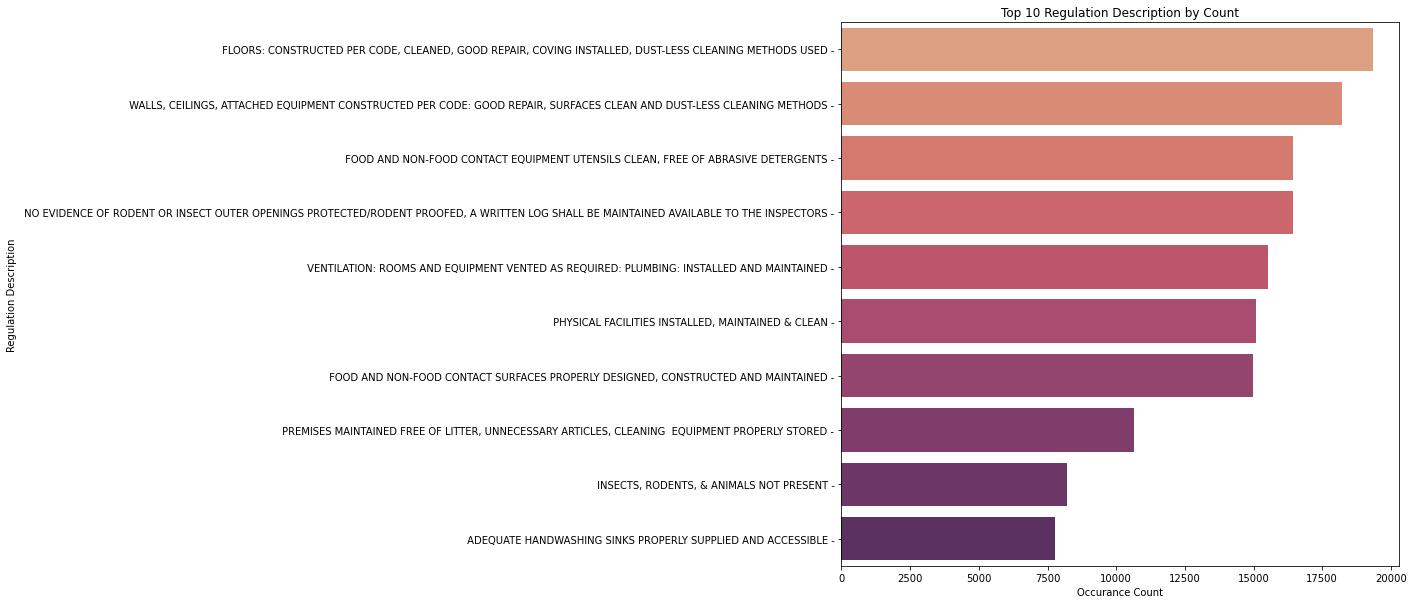

In [169]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=[10,10])
sns.barplot(y = "Regulation Description",x="Occurance Count",data=df_plot,palette="flare")
plt.title("Top 10 Regulation Description by Count")

We see that most food inspections in restaurants and other food establishments have the above Regulation Descriptions. We can infer that most of these establishments follow the codes stated in terms of their floors, repair, cleaning methods, construction and utensil and food cleanliness. 

Overall, we can infer that the restaurants in Chicago are properly regulated, hygenic and well maintained. 